In [3]:
import scanpy as sc
import cellbin_moran as cm

# Read the data and split it by samples

In [4]:
xiangdata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/MERFISH_Data.h5ad')

In [5]:

sample_dict = {sample: xiangdata[xiangdata.obs['sample'] == sample].copy() for sample in xiangdata.obs['sample'].unique()}

In [6]:
plaquedata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/Plaques_Object.h5ad')

In [7]:
plaque_dict = {sample: plaquedata[plaquedata.obs['sample'] == sample].copy() for sample in plaquedata.obs['sample'].unique()}

In [8]:
# Check for intersection of keys between sample_dict and plaque_dict
intersection_keys = set(sample_dict.keys()).intersection(plaque_dict.keys())
print(intersection_keys)

intersection_keys = list(intersection_keys)

{'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_1/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_0/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/'}


# Moran's I

In [10]:
plaque = plaque_dict[intersection_keys[0]].copy()
adata = sample_dict[intersection_keys[0]].copy()

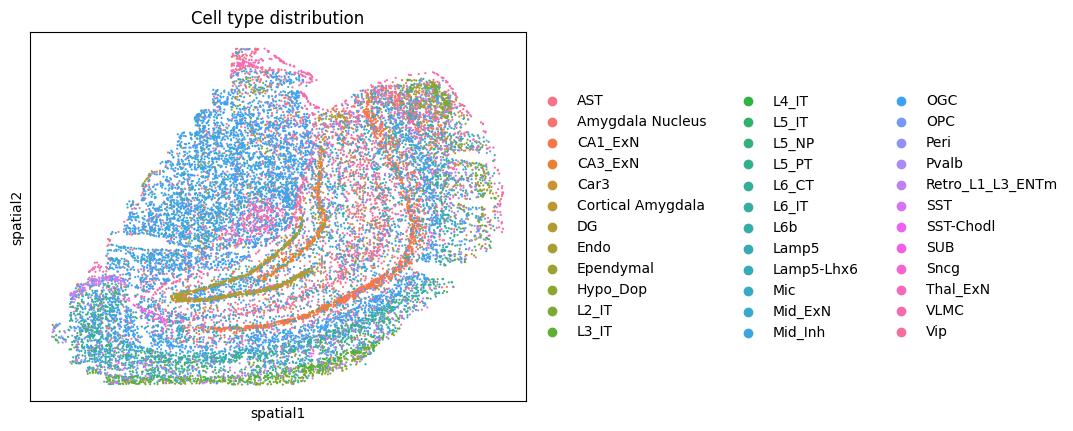

In [21]:
sc.pl.embedding(adata, basis='spatial', color='cluster', s=10, title='Cell type distribution')

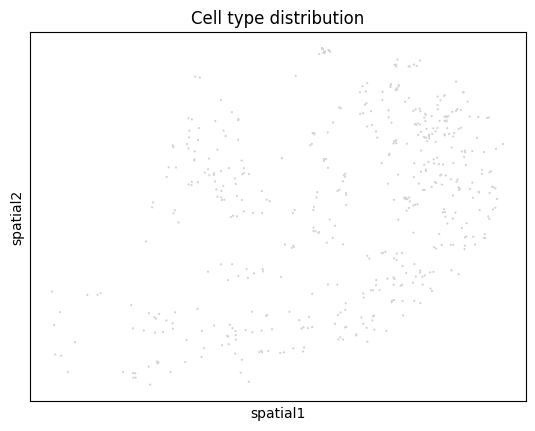

In [25]:
sc.pl.embedding(plaque, basis='spatial', s=10, title='Cell type distribution')

In [11]:
from scipy.spatial import cKDTree

In [12]:
tree = cKDTree(plaque.obsm['spatial'])
idx, dist = tree.query(adata.obsm['spatial'], k=1)
adata.obs['distance_to_plaque'] = dist

In [13]:
adata

AnnData object with n_obs × n_vars = 19034 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'distance_to_plaque'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

In [14]:
moran_test = cm.al.compute_neighbor_moran_i_by_category(adata, 'distance_to_plaque', 'cluster', use_embedding=True, embedding_key='X_pca_harmony')

2024-10-09 08:46:08,624 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:46:08,627 - INFO - Identified 36 unique cell types in category 'cluster'.
2024-10-09 08:46:08,631 - INFO - Processing cell type: Amygdala Nucleus
2024-10-09 08:46:08,632 - INFO - Processing cell type: AST
2024-10-09 08:46:08,632 - INFO - Processing cell type: CA1_ExN
2024-10-09 08:46:08,633 - INFO - Processing cell type: CA3_ExN
2024-10-09 08:46:08,639 - INFO - Processing cell type: Car3
2024-10-09 08:46:08,642 - INFO - Processing cell type: Cortical Amygdala
2024-10-09 08:46:08,648 - INFO - Processing cell type: DG
2024-10-09 08:46:08,650 - INFO - Processing cell type: Endo
/public/home/jijh/micromamba/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [26]:
moran_test

,Moran's I,P-value,num_cell
cluster,,,
L2_IT,0.053334,0.000000e+00,763
CA1_ExN,0.035863,0.000000e+00,1108
Pvalb,0.026047,0.000000e+00,281
L5_NP,0.024972,8.434428e-91,128
CA3_ExN,0.021243,0.000000e+00,354
L5_PT,0.021113,0.000000e+00,259
L6_IT,0.021041,0.000000e+00,360
Mid_ExN,0.016151,0.000000e+00,579
Amygdala Nucleus,0.015157,2.245069e-152,239


In [27]:
from scipy.spatial import cKDTree

for key in intersection_keys:
    plaque = plaque_dict[key]
    adata = sample_dict[key]
    
    tree = cKDTree(plaque.obsm['spatial'])
    idx, dist = tree.query(adata.obsm['spatial'], k=1)
    adata.obs['distance_to_plaque'] = dist
    

In [29]:
from concurrent.futures import ThreadPoolExecutor

def compute_moran_for_key(key):
    plaque = plaque_dict[key]
    adata = sample_dict[key]
    
    tree = cKDTree(plaque.obsm['spatial'])
    idx, dist = tree.query(adata.obsm['spatial'], k=1)
    adata.obs['distance_to_plaque'] = dist
    
    moran_test = cm.al.compute_neighbor_moran_i_by_category(adata, 'distance_to_plaque', 'cluster', use_embedding=True, embedding_key='X_pca')
    return key, moran_test

moran_results = {}

with ThreadPoolExecutor() as executor:
    futures = {executor.submit(compute_moran_for_key, key): key for key in intersection_keys}
    for future in futures:
        key, moran_test = future.result()
        moran_results[key] = moran_test



2024-10-09 08:54:34,972 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:54:34,972 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:54:34,974 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:54:34,974 - INFO - Identified 37 unique cell types in category 'cluster'.
2024-10-09 08:54:34,976 - INFO - Identified 36 unique cell types in category 'cluster'.
2024-10-09 08:54:34,979 - INFO - Processing cell type: Amygdala Nucleus
2024-10-09 08:54:34,979 - INFO - Processing cell type: AST
2024-10-09 08:54:34,979 - INFO - Identified 36 unique cell types in category 'cluster'.
2024-10-09 08:54:34,980 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:54:34,980 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:54:34,980 - INFO - Processing cell type: CA1_ExN
2024-10-09 08:54:34,981 - INFO - Proc

: 

In [32]:
for ke, df in moran_results.items():
    df.reset_index(inplace=True)
    df['sample'] = ke

In [41]:
import pandas as pd
import seaborn as sns

In [36]:
con_results = pd.concat(moran_results.values(), ignore_index=True)

In [38]:
con_results.to_csv('moran_results.csv', index=False)

In [39]:
con_results

,cluster,Moran's I,P-value,num_cell,sample
0,L2_IT,0.053965,0.000000e+00,763,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
1,CA1_ExN,0.036658,0.000000e+00,1108,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
2,Pvalb,0.026189,0.000000e+00,281,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
3,L5_NP,0.025024,2.762604e-91,128,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
4,L6_IT,0.021417,0.000000e+00,360,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
...,...,...,...,...,...
345,DG,0.003312,1.158753e-301,1832,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
346,Hypo_Dop,-0.000793,2.685124e-02,94,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
347,AST,NaN,NaN,8895,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
348,CHOR,NaN,NaN,31,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...


<Axes: xlabel='cluster', ylabel="Moran's I">

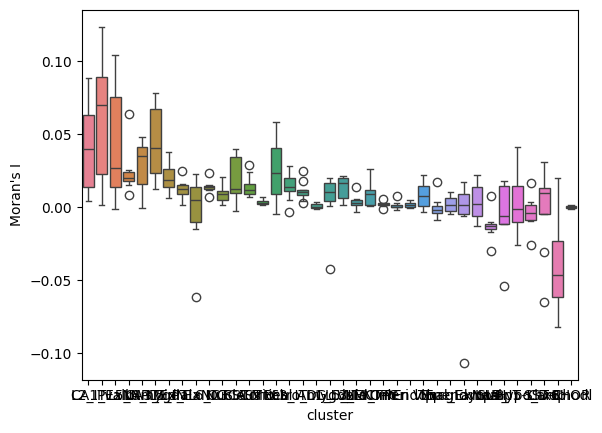

In [42]:
sns.boxplot(data=con_results, x='cluster', y="Moran's I", hue='cluster')